#  <center> Problem Set 1 <center>
<center> Spring 2022 <center>
<center> 3.C01/3.C51, 10.C01/10.C51, 20.C01/20.C51 <center>
<center> Due: TBD 2022 <center>

<b>Name: Kaden DiMarco</b>

<b>Kerberos ID: kaden167</b>

### Instructions: 

Put your code in the code block like this:

In [3]:
! git clone https://github.com/vikram-sundar/ML4MolEng_Spring2022.git

fatal: destination path 'ML4MolEng_Spring2022' already exists and is not an empty directory.


In [4]:
# import packages
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

# models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# metrics 
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# plotting style, you can choose your own parameters
import matplotlib

matplotlib.rcParams.update({'font.size': 15})
matplotlib.rc('lines', linewidth=3, color='g')
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams["xtick.major.size"] = 6
matplotlib.rcParams["ytick.major.size"] = 6
matplotlib.rcParams["ytick.major.width"] = 2
matplotlib.rcParams["xtick.major.width"] = 2
matplotlib.rcParams['text.usetex'] = False

Run my code here


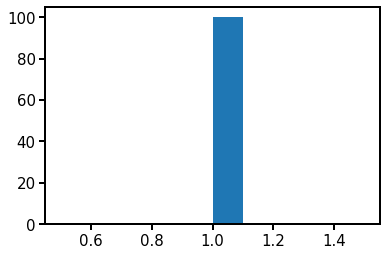

In [5]:
########### 𝙲𝚘𝚍𝚎 #############  
def mycode():
    print("Run my code here")
    
def plot():
    plt.hist(np.ones(100))

mycode()
plot()
########### 𝙲𝚘𝚍𝚎 ############# 

We have provided print statements where numerical answers are expected. 

Your answer should be contained in a variable which you defined either in the Answer Block or the Code Block.

When a qualitative answer is expected, you can write answer as code comments by placing a # before your answer.

Your Answer Block should look like the following: 

In [6]:
########## Answer ############ + $

ans = 2
print("My answer is: {}.".format(ans))

# My regressor over-fitted the training data, I need to add regularization + $

########## Answer ############ + $

My answer is: 2.


In [7]:
# A helper function for students to produce plots 
def plot_clf(model, X, y, title): 
    
    '''
        A function to plot confusion matrix and ROC curve 
        
        Args: 
            model(classifier object): model object (e.g. RandomForestClassifier, LogisticRegression)
            X(np.array): feature set
            y(np.array): label set 
            title(str): plot name
            
        Example Usage: 
            plot_clf(model, X_test, y_test, "test")
    '''
    
    fig, [ax_roc, ax_conf] = plt.subplots(1, 2, figsize=(12, 6))
    fig.tight_layout()
    
    RocCurveDisplay.from_estimator(model, X, y, ax=ax_roc)
    ConfusionMatrixDisplay.from_estimator(model, X, y, ax=ax_conf)

    ax_roc.set_title('{} ROC'.format(title))
    ax_conf.set_title('{} Confusion Matrix'.format(title))

    plt.show()

## <center>Problem 1 (Preliminary Modeling) <center>

In [8]:
# Download data 

!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/breastcancer_X.csv
!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/breastcancer_y.csv

--2022-02-16 18:13:23--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/breastcancer_X.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 469363 (458K) [text/plain]
Saving to: ‘breastcancer_X.csv’

breastcancer_X.csv  100%[===================>] 458.36K  --.-KB/s    in 0.04s   

2022-02-16 18:13:24 (10.2 MB/s) - ‘breastcancer_X.csv’ saved [469363/469363]

--2022-02-16 18:13:24--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/breastcancer_y.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP r

### 1.1 (5 points) Load and inspect the raw data

We have provided the code to load the dataset. Take a moment to understand what each line is doing. Briefy explain what each line of the code is doing by providing short comments below. 

You will have to do it by yourself again in Problem 2.

In [9]:
p1_X = pd.read_csv("./breastcancer_X.csv", header='infer', index_col=0) # Reads downloaded csv file matching name in input, infers where header is and indexes all data and store as var name
p1_y = pd.read_csv("./breastcancer_y.csv", header='infer', index_col=0) #  Reads downloaded csv file matching name in input, infers where header is and indexes all data and store as var name

metabolite_name = p1_X.columns.tolist() # metabolite name is contained in the header of each column as data elem, converted into a list

p1_X = p1_X.values # make var a view object
p1_y = p1_y.values # make var a view object

Report how many examples are in this dataset and the number of features for each data point.

In [10]:
########## Answer ############

x_shape = p1_X.shape

N_samples = x_shape[0]
N_features = x_shape[1]

print("There are {} samples.".format(N_samples))
print("There are {} features per sample.".format(N_features))

########## Answer ############

There are 211 samples.
There are 128 features per sample.


### 1.2 (5 points) Generate train/test splits

Split the dataset into train and test sets.

In [11]:
########### Code #############
X_train, X_test, y_train, y_test = train_test_split(p1_X, p1_y, test_size=0.2, random_state=42) #random state is a random number generator seed used so splits arnt continuously rerandomized

########### Code #############

Print the shapes of your four variables, X_train, X_test, y_train, and y_test, and ensure sure that the dimensions match your expectations.

In [12]:
########## Answer ############
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape = X_test.shape
y_test_shape = y_test.shape

print("X_train shape: {}".format(X_train_shape))
print("y_train shape: {}".format(y_train_shape))

print("X_test shape: {}".format(X_test_shape))
print("y_test shape: {}".format(y_test_shape))

########## Answer ############

X_train shape: (168, 128)
y_train shape: (168, 1)
X_test shape: (43, 128)
y_test shape: (43, 1)


### 1.3 (5 points) Preprocess the data through scaling

Scale the dataset.

In [13]:
########### Code #############
from sklearn import preprocessing  #even though sklearn was imported above, preprocessing was not defined until I wrote this line
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


########### Code #############

Print the mean/variance for each transformed feature.

In [14]:
########## Answer ############
X_train_scaled_mean = X_train_scaled.mean(axis=0)
X_test_scaled_mean = X_test_scaled.mean(axis=0)
X_train_scaled_var = X_train_scaled.var(axis=0)
X_test_scaled_var = X_test_scaled.var(axis=0)


print("The means of the transformed training feature set are {}".format(X_train_scaled_mean) )
print("The means of the transformed test feature set are {}".format(X_test_scaled_mean) )
print("The variances of the transformed training feature set are {}".format(X_train_scaled_var) )
print("The variances of the transformed test feature set are {}".format(X_test_scaled_var) )

########## Answer ############

The means of the transformed training feature set are [ 4.30938354e-15  2.65858764e-15  1.99245382e-16  1.56885087e-15
  6.85959226e-16  3.91221447e-16  7.58321977e-16  2.75573215e-16
  1.83252884e-15  2.24027146e-16 -4.44089210e-16  1.44196824e-15
 -5.12817302e-16  4.40784975e-16 -4.01794999e-16  8.51170986e-16
  4.62592927e-17 -7.16192978e-16  4.05760082e-16  1.46047196e-16
 -5.97405723e-16 -1.81072089e-16  2.93416085e-16  4.65897162e-16
 -4.52680221e-16  5.76258618e-16  6.76185918e-16 -2.72268980e-16
 -3.19189120e-16  7.40148683e-17 -5.99388264e-16 -1.34812796e-16
  2.44348192e-15  4.30872269e-16  8.73474573e-16  1.08742380e-15
  5.35286101e-16 -7.38826989e-16  1.31178137e-16 -2.67643051e-16
  7.28914283e-16 -1.77189612e-16  9.17916536e-16  4.42767516e-17
 -1.21199347e-15 -2.17418676e-16 -2.18740370e-16 -3.46283848e-16
 -6.30448075e-16  2.13453593e-16  1.24569667e-15 -2.12792746e-16
  4.50697680e-16 -4.03116693e-16 -7.81121199e-16  3.17950031e-16
  3.46283848e-16  1.09155410e-15 -2.

### 1.4 (15 points) Train and evaluate a logistic regression model

Train and evaluate a Logistic Regression model.

In [15]:
########### Code #############

clf = LogisticRegression(random_state=0).fit(X_train_scaled, np.ravel(y_train))

########### Code #############

Report the AUC score for both training and testing data. 

In [16]:
########## Answer ############
train_auc = roc_auc_score(y_train, clf.predict_proba(X_train_scaled)[:, 1])
test_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])


print("The training AUC score is {:.3f}".format(train_auc) )
print("The testing AUC score is {:.3f}".format(test_auc) )

########## Answer ############

The training AUC score is 1.000
The testing AUC score is 1.000


Generate plots for the confusion matrices and the ROC curve for both training and testing. Please use the plot_clf function defined above.

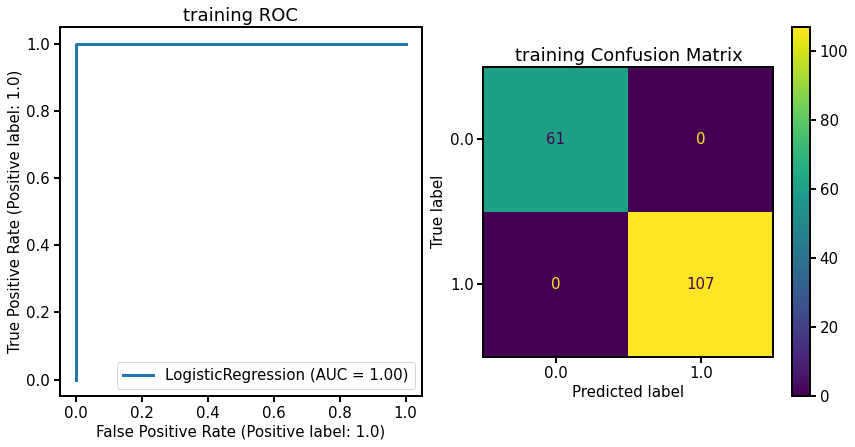

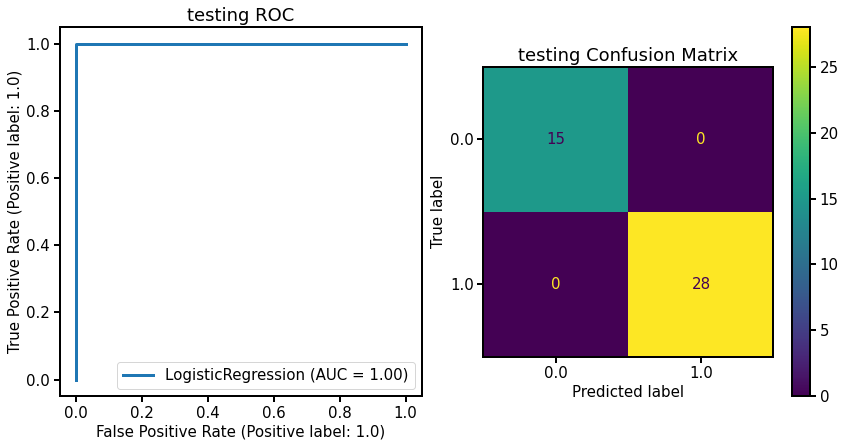

In [17]:
########### Code #############
plot_clf(clf, X_train_scaled, y_train, "training")
plot_clf(clf, X_test_scaled, y_test, "testing")

########### Code #############

### 1.5 (5 points) Perform a more thorough cross-validation.

Perform cross-validation.

In [18]:
########### Code #############
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(preprocessing.StandardScaler(), LogisticRegression())
Pipeline(steps=[('scaler', preprocessing.StandardScaler()), ('model', LogisticRegression())])


########### Code #############

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

Report the cross validated ROC-AUC score in terms of its mean and standard deviation.

In [19]:
########## Answer ############

crossVal = cross_val_score(pipeline, p1_X, np.ravel(p1_y), scoring='roc_auc', cv = 5)

mean = np.mean(crossVal)
std = np.std(crossVal)


print("The mean of CV scores is {:.2f}".format(mean) )
print("The std of CV scores is {:.2f}".format(std) )


########## Answer ############

The mean of CV scores is 0.99
The std of CV scores is 0.02


### 1.6  (optional +2.5 points) Connect model coefficients back to metabolites

Identify the top 5 metabolites that positively correlated the most with positive diagnosis.

In [20]:
########### Code #############
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selector = SelectKBest(chi2, k=5)
selector.fit(p1_X, p1_y)
cols = selector.get_support(indices=True)
print(cols)

########### Code #############

[2 4 5 6 7]


Report the metabolites you identified.

In [21]:
########## Answer ############




metabolites = np.asarray(metabolite_name)[cols]

print("The top 5 metabolites are {}".format(", ".join(metabolites)) )



########## Answer ############

The top 5 metabolites are 1-hydroxy-1-cyclohexen, 2,3-Dihydroxybutanoic acid, 2,3'-Dipyridyl, 2,4-bishydroxybutanoic acid, 2-amino-6-methylaminohexanoic acid


### 1.7 (10 points) Quantify the effects of a reduced feature space

For each hypothetical featurization, obtain an average ROC-AUC and its standard deviation through a 5-fold CV. 

In [22]:
########### Code #############

selected_cols = np.round(np.multiply(128, [0.05, 0.1,0.2,0.4,0.6,0.8,1]))
number_of_cols = p1_X.shape[1]



results_idx = 0 #tracks through final results array that will contain plotting data
results = np.zeros((2,7))
sub_results_idx = 0 #tracks through regression interations for each col selection
sub_results = np.zeros((2,15))

for i in selected_cols:
  sub_results_idx = 0
  for j in range(0,15):
    random_indices = np.random.choice(number_of_cols, size=int(i), replace=False)
    randomized_features = p1_X[:,random_indices]
    crossVal = cross_val_score(pipeline, randomized_features, np.ravel(p1_y), scoring='roc_auc')

    mean = np.mean(crossVal)
    std = np.std(crossVal)
    sub_results[0,sub_results_idx] = mean
    sub_results[1,sub_results_idx] = std
    sub_results_idx = sub_results_idx+1

  #results contains the AUC calculations regarding the set of randomized features

  results[0,results_idx] = np.mean(sub_results[0,:])
  results[1,results_idx] = np.mean(sub_results[1,:]) #adds average of all 15 regressions for each set of columns
  results_idx = results_idx + 1


print(results)











########### Code #############

[[0.80055144 0.89124486 0.96603909 0.98002675 0.98202263 0.98503292
  0.98666667]
 [0.06866423 0.04471008 0.02583649 0.02031513 0.02031322 0.01950447
  0.01979009]]


Use matplotlib to generate one scatter plot showing these cross-validated test AUC score (y-axis) as a function of the different feature subset sizes (x-axis) with error bars corresponding to the standard deviations. Here, we provide an example plotting code. 

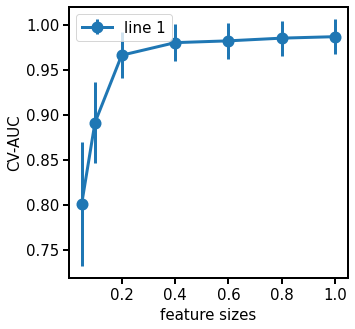

In [23]:
########### Code #############

# generate random data 
feature_sizes = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8,1.0]
y_auc = results[0,:]
y_uncer = results[1,:]

# plotting code 
plt.figure(figsize=(5,5)) # define figure size 
plt.errorbar(feature_sizes, y_auc, y_uncer, marker='o', ms=10, mew=2, label='line 1') 
plt.xlabel('feature sizes')
plt.ylabel('CV-AUC')
plt.legend()
plt.show()

########### Code #############

# <center>Problem 2 (Adding regularization to reduce overfitting)</center>

In [24]:
!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/liver_X.csv
!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/liver_y.csv

--2022-02-16 18:13:33--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/liver_X.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 757566 (740K) [text/plain]
Saving to: ‘liver_X.csv’

liver_X.csv         100%[===================>] 739.81K  --.-KB/s    in 0.05s   

2022-02-16 18:13:33 (13.2 MB/s) - ‘liver_X.csv’ saved [757566/757566]

--2022-02-16 18:13:33--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/liver_y.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respon

### 2.1 (10 points) Unregularized logistic regression

Follow the same procedure from Part 1 to load the data, split the data, and scale the data.

In [25]:
########### Code #############
p2_X = pd.read_csv("./liver_X.csv", header='infer', index_col=0) # Reads downloaded csv file matching name in input, infers where header is and indexes all data and store as var name
p2_y = pd.read_csv("./liver_y.csv", header='infer', index_col=0) #  Reads downloaded csv file matching name in input, infers where header is and indexes all data and store as var name

metabolite_name_p2 = p2_X.columns.tolist() # metabolite name is contained in the header of each column as data elem, converted into a list

p2_X = p2_X.values # make var a view object
p2_y = p2_y.values # make var a view object

X_train2, X_test2, y_train2, y_test2 = train_test_split(p2_X, p2_y, test_size=0.2, random_state=42)

from sklearn import preprocessing  #even though sklearn was imported above, preprocessing was not defined until I wrote this line
scaler2 = preprocessing.StandardScaler().fit(X_train2)
X_train2_scaled = scaler2.transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)








########### Code #############

Train a logistic regression model, and test its performance.

In [26]:
########### Code #############

clf2 = LogisticRegression(random_state=0, penalty='none').fit(X_train2_scaled, np.ravel(y_train2))

train2_auc = roc_auc_score(y_train2, clf2.predict_proba(X_train2_scaled)[:, 1])
test2_auc = roc_auc_score(y_test2, clf2.predict_proba(X_test2_scaled)[:, 1])





########### Code #############

Generate Confusion Matrix and ROC curve.

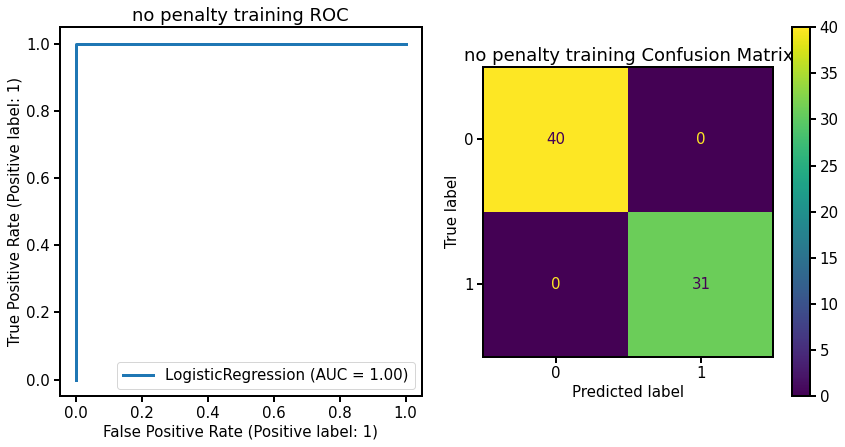

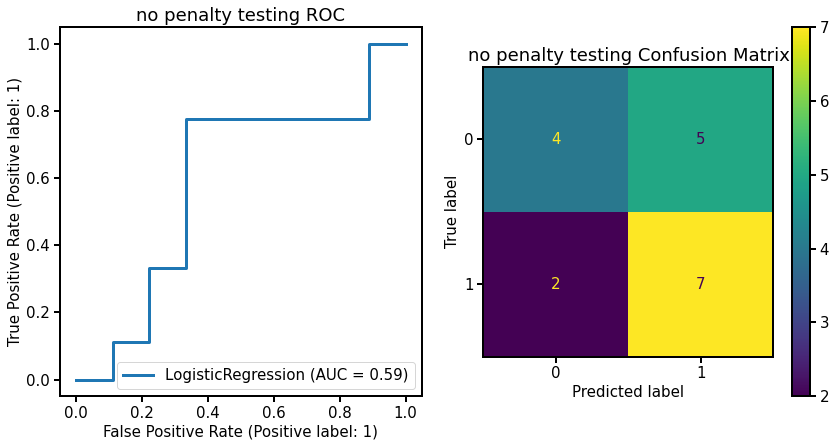

In [27]:
########### Code #############

plot_clf(clf2, X_train2_scaled, y_train2, "no penalty training")
plot_clf(clf2, X_test2_scaled, y_test2, "no penalty testing")

########### Code #############

Report your test ROC-AUC score. 

In [28]:
########## Answer ############

print("The training AUC score is {:.2f}".format(train2_auc) )
print("The testing AUC score is {:.2f}".format(test2_auc) )
#The model performs much better on the training set. This is likely due to overfitting, or to the lack of regularization

########## Answer ############

The training AUC score is 1.00
The testing AUC score is 0.59


### 2.2 (5 points) Introduce L1 regularization

Run L1-regularized logistic regression.

In [29]:
########### Code #############
clf2_2 = LogisticRegression(random_state=0, penalty='l1', solver='saga').fit(X_train2_scaled, np.ravel(y_train2))


########### Code #############

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Report ROC-AUC score.

In [30]:
########## Answer ############
train2_2_auc = roc_auc_score(y_train2, clf2_2.predict_proba(X_train2_scaled)[:, 1])
test2_2_auc = roc_auc_score(y_test2, clf2_2.predict_proba(X_test2_scaled)[:, 1])

print("The training AUC score is {:.2f}".format(train2_2_auc) )
print("The testing AUC score is {:.2f}".format(test2_2_auc) )

########## Answer ############

The training AUC score is 1.00
The testing AUC score is 0.65


Generate Confusion Matrix and ROC curve.

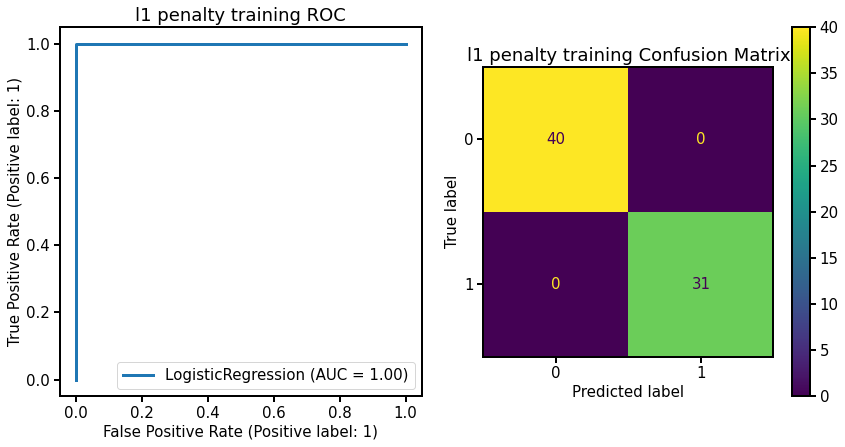

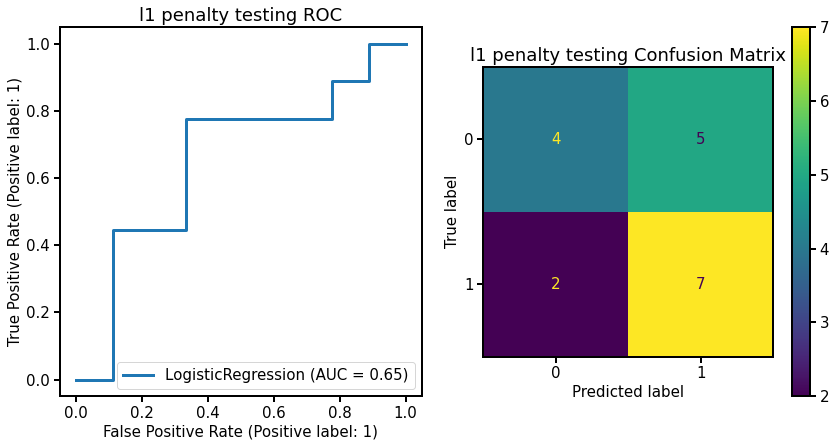

In [31]:
########### Code #############

plot_clf(clf2_2, X_train2_scaled, y_train2, "l1 penalty training")
plot_clf(clf2_2, X_test2_scaled, y_test2, "l1 penalty testing")

########### Code #############

Generate the histogram of model coefficients.

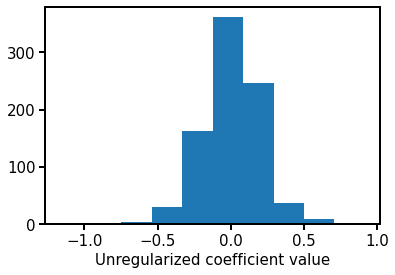

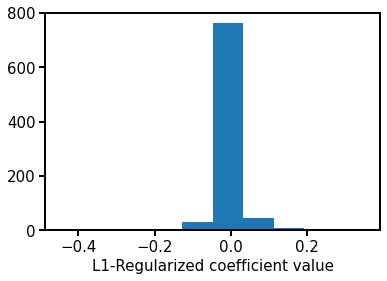

In [55]:
########### Code #############
import matplotlib.pyplot as plt

    



coef2_2 = clf2_2.coef_
coef2 = clf2.coef_


plt.figure(0)
plt.hist(coef2[0])

plt.xlabel('Unregularized coefficient value');

plt.figure(1)
plt.hist(coef2_2[0])
plt.xlabel('L1-Regularized coefficient value');
  




########### Code #############

Comment on the histogram you obtained. 

In [33]:
########## Answer ############

#the non-penalized model has less coefficient clustering around 0, larger outliers, and smaller sized clusters 

########## Answer ############

### 2.3 (5 points) Introduce L2 regularization

Run L2-regularized logistic regression.

In [34]:
########### Code #############

clf2_3 = LogisticRegression(random_state=0, penalty='l2', solver='saga', C = 0.1).fit(X_train2_scaled, np.ravel(y_train2))

########### Code #############

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Report test ROC-AUC score.

In [35]:
########## Answer ############

train2_3_auc = roc_auc_score(y_train2, clf2_3.predict_proba(X_train2_scaled)[:, 1])
test2_3_auc = roc_auc_score(y_test2, clf2_3.predict_proba(X_test2_scaled)[:, 1])

print("The training AUC score is {:.2f}".format(train2_3_auc) )
print("The testing AUC score is {:.2f}".format(test2_3_auc) )

########## Answer ############

The training AUC score is 1.00
The testing AUC score is 0.59


Generate Confusion Matrix and ROC curve.

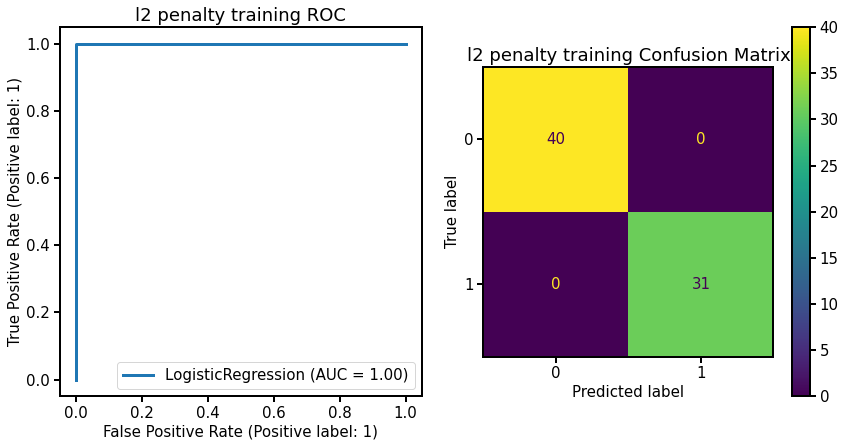

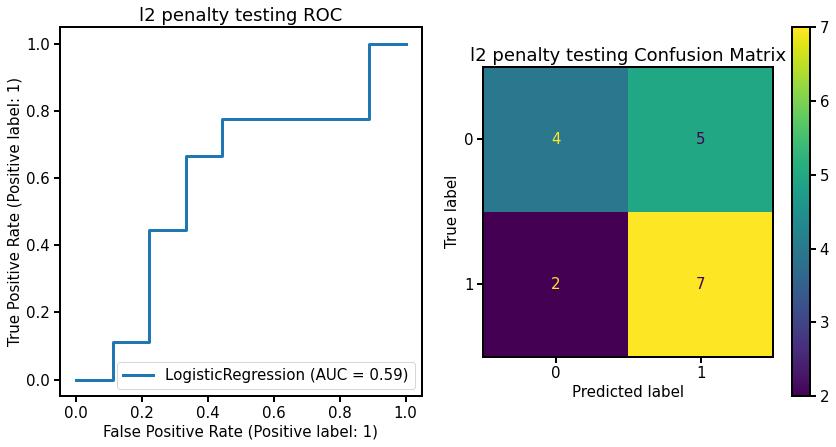

In [36]:
########### Code #############

plot_clf(clf2_3, X_train2_scaled, y_train2, "l2 penalty training")
plot_clf(clf2_3, X_test2_scaled, y_test2, "l2 penalty testing")

########### Code #############

Generate the histogram of model coefficients.

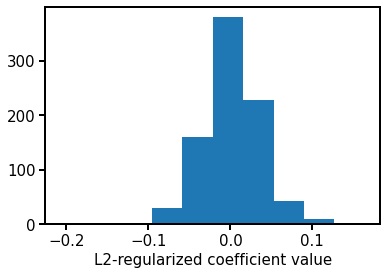

In [54]:
########### Code #############

coef2_3 = clf2_3.coef_


plt.figure(0)
plt.hist(coef2_3[0])


plt.xlabel('L2-regularized coefficient value');

########### Code #############

Comment on your histogram.

In [38]:
########## Answer ############
#so far, this histogram represents the narrowest range of coeficients
#There are several clusters with many coeficients with very similar values


########## Answer ############

### 2.4 (10 points) Quantify the extent of overfitting as a function of training set size

Run un-regularized and L1-regularized logistic regressions for the following random train/test splits:

{20%/30%, 30%/30%, 40%/30%, 50%/30%, 60%/30%}. 

In [39]:
########### Code #############
def run_regression(train_split, regularize_state):
  sub_results_idx = 0 #tracks through regression interations for each split/regularization
  sub_results = np.zeros((2,25))


  for i in range(0,25):
    X_train4, X_test4, y_train4, y_test4 = train_test_split(p2_X, p2_y, train_size=train_split, test_size=0.3, random_state=42) #get splits
    scaler4 = preprocessing.StandardScaler().fit(X_train4) #scale data
    X_train4_scaled = scaler4.transform(X_train4)
    X_test4_scaled = scaler4.transform(X_test4)

    if regularize_state == 0: #run regression 
      clf4 = LogisticRegression(random_state=0, penalty='none').fit(X_train4_scaled, np.ravel(y_train4))
    else:
      clf4 = LogisticRegression(random_state=0, penalty='l1', solver='saga').fit(X_train4_scaled, np.ravel(y_train4))

    train4_auc = roc_auc_score(y_train4, clf4.predict_proba(X_train4_scaled)[:, 1]) #calc and store auc for both training and test sets
    test4_auc = roc_auc_score(y_test4, clf4.predict_proba(X_test4_scaled)[:, 1])
    sub_results[0,i] = train4_auc
    sub_results[1,i] = test4_auc

  mean_train_auc = np.mean(sub_results[0,:]) #retuurn averages over the times the regression was rerun
  std_train_auc = np.std(sub_results[0,:])
  mean_test_auc = np.mean(sub_results[1,:])
  std_test_auc = np.std(sub_results[1,:])

  return np.array([[mean_train_auc], [std_train_auc], [mean_test_auc], [std_test_auc]])

s1_noP = run_regression(0.2, 0)
s2_noP = run_regression(0.3, 0)
s3_noP = run_regression(0.4, 0)
s4_noP = run_regression(0.5, 0)
s5_noP = run_regression(0.6, 0)

noP_auc = np.hstack((s1_noP,s2_noP,s3_noP,s4_noP,s5_noP)) #contains all non-regularized data

s1_l1 = run_regression(0.2, 1)
s2_l1 = run_regression(0.3, 1)
s3_l1 = run_regression(0.4, 1)
s4_l1 = run_regression(0.5, 1)
s5_l1 = run_regression(0.6, 1)

l1_auc = np.hstack((s1_l1,s2_l1,s3_l1,s4_l1,s5_l1)) #contains all regularized data



########### Code #############

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Plot training/testing ROC-AUC score as a function of train size for L1-regularized and un-regularized regressions. We have provided example plotting code with random data. You can use it as a template to generate two plots: one for the L1-regularized regression, and one for the un-regularized regression.

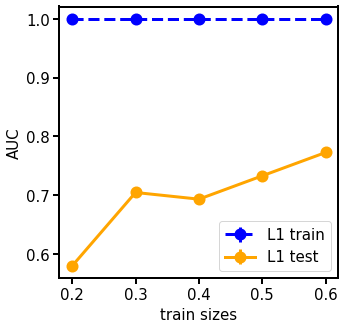

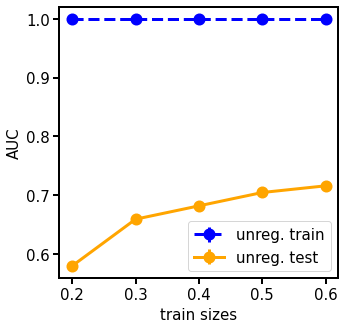

In [40]:
########### Code #############

# generate random data 
train_sizes = [0.2, 0.3, 0.4, 0.5, 0.6]

# Define l1 plots 
plt.figure(figsize=(5,5))

# first plot
plt.errorbar(train_sizes, l1_auc[0,:], l1_auc[1,:],
             marker='o', color='blue', linestyle='--',
             ms=10, mew=2, label='L1 train')

# 2nd plot
plt.errorbar(train_sizes, l1_auc[2,:], l1_auc[3,:], 
             marker='o', color='orange',  ms=10, linestyle='-', 
             mew=2, label='L1 test') # plotting for test score

plt.xlabel('train sizes')
plt.ylabel('AUC')
plt.legend()
plt.show()

# Define no randomization plots 
plt.figure(figsize=(5,5))

# first plot
plt.errorbar(train_sizes, noP_auc[0,:], noP_auc[1,:],
             marker='o', color='blue', linestyle='--',
             ms=10, mew=2, label='unreg. train')

# 2nd plot
plt.errorbar(train_sizes, noP_auc[2,:], noP_auc[3,:], 
             marker='o', color='orange',  ms=10, linestyle='-', 
             mew=2, label='unreg. test') # plotting for test score

plt.xlabel('train sizes')
plt.ylabel('AUC')
plt.legend()
plt.show()

########### Code #############

Comment  on  when  the  model  is  most  prone  to  poor generalization (i.e., a large gap between training and testing performance):  with or without regularization?  For large or small training set sizes?

In [41]:
########## Answer ############
# overall, the model is most prone to poor generalization without regularization with small training set sizes




########## Answer ############

# <center>Problem 3: Random Forests and Hyperparameter Optimization</center>

### 3.1 (5 points) Train a Random Forest classifier

Run cross-validation to train a Random Forest classifier.

In [42]:
########### Code #############
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators=20, max_depth=2)
scaler4 = preprocessing.StandardScaler().fit(p2_X) #scale data
p2_X_scaled = scaler4.transform(p2_X)
crossVal = cross_val_score(clf, p2_X_scaled, np.ravel(p2_y), scoring='roc_auc', cv = 5)

########### Code #############

Report the cross-validated ROC-AUC score.

In [43]:
########## Answer ############

mean = np.mean(crossVal)
std = np.std(crossVal)

print("The mean of CV scores is {:.2f}".format(mean) )
print("The std of CV scores is {:.2f}".format(std) )

########## Answer ############

The mean of CV scores is 0.66
The std of CV scores is 0.13


### 3.2 (15 points) Perform a hyperparameter optimization with a grid search

In [44]:
parameters = {'model__n_estimators': [20, 40, 80, 160, 320, 640, 1280], 
              'model__min_samples_split': [8, 10, 12, 24], 
              'model__max_depth': [2, 4, 8]}

Describe the total number of possible parameter combinations given the parameter ranges given.

In [45]:
########## Answer ############
from sklearn.model_selection import ParameterGrid
pg = ParameterGrid(parameters)
N_cv = 5
N_comb = len(pg)*N_cv

print("There are {} different combinations".format(N_comb))

print(RandomForestClassifier().get_params().keys())
########## Answer ############

There are 420 different combinations
dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


Use the provided parameter set to run grid hyperparameter search with cross-validation. 

In [46]:
########### Code #############
X_train, X_test, y_train, y_test = train_test_split(p2_X, p2_y, train_size=0.8, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()), ('model', RandomForestClassifier())])
search = GridSearchCV(estimator = pipeline, param_grid=parameters, scoring='roc_auc', cv = 5, verbose = 0, n_jobs = -1)
search.fit(X_train, np.ravel(y_train))

results = search.cv_results_




########### Code #############

Report the obtained parameter set. Answer in code comments.

In [47]:
########## Answer ############

best_parameters = search.best_estimator_.get_params()
print(best_parameters)

# The optimized parameter set is:
# {
#    'model__n_estimators': #160,  
#    'model__min_samples_split': #8,
#    'model__max_depth': #8
# }

########## Answer ############

{'memory': None, 'steps': [('scaler', StandardScaler()), ('model', RandomForestClassifier(max_depth=8, min_samples_split=8, n_estimators=320))], 'verbose': False, 'scaler': StandardScaler(), 'model': RandomForestClassifier(max_depth=8, min_samples_split=8, n_estimators=320), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__bootstrap': True, 'model__ccp_alpha': 0.0, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 8, 'model__max_features': 'auto', 'model__max_leaf_nodes': None, 'model__max_samples': None, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 1, 'model__min_samples_split': 8, 'model__min_weight_fraction_leaf': 0.0, 'model__n_estimators': 320, 'model__n_jobs': None, 'model__oob_score': False, 'model__random_state': None, 'model__verbose': 0, 'model__warm_start': False}


Report the best cross-validation score from your grid search.

In [48]:
########## Answer ############

print("The best cross-validated AUC score is {:.2f}".format(search.best_score_))

########## Answer ############

The best cross-validated AUC score is 0.84


Make predictions on the test data with your best model and report the AUC score.

In [56]:
########## Answer ############
clf4 = RandomForestClassifier(n_estimators=160, max_depth=8,min_samples_split = 8)
scaler4 = preprocessing.StandardScaler().fit(X_train) #scale data
X_test_scaled = scaler4.transform(X_test)
clf4.fit(X_test_scaled, np.ravel(y_test))
test_auc = roc_auc_score(y_test, clf4.predict_proba(X_test_scaled)[:, 1])

print("The test AUC score calculated with the best model is {:.2f}".format(test_auc))

########## Answer ############

The test AUC score calculated with the best model is 1.00
